## Filtering for Hardy-Weinberg equilibrium


<br>

This notebook filters loci that are out of Hardy-Weinberg equilibrium. 

### 1. Ran GENEPOP 

On the genepop file `batch_1_filteredIndivids_filteredMAFfilteredLoci20p.txt`

Use the options: 
`1... Hardy-Weinberg exact tests >> 3...test for each locus in each population, Probability test`



<br>

### 2. Parse GENEPOP output

Genepop put out a file `batch_1...txt.P` that contains, at the bottom, a list of by-locus p-values and Fis estimates by population. 

I created the following script to parse out this information into TWO tab-delimited files that are organized as 2x2 charts: locus in the first column, and population in the first row. The first file gives calculated HWE p-values, and the second file contains the W&C Fis estimates.  

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [24]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [25]:
!head parse_genepop_HWEbylocus.py

#### This script will take the output file from genepop's HWE by locus exact test (option 1 >>> 3) and create two files with 2x2 arrays to parse out the HWE p-value and the HWE Fis value per locus per population      ####

## at command line: python parse_genepop_HWEbylocus.py ARG1 ##
##---ARG



import argparse

parser = argparse.ArgumentParser()


In [37]:
!python parse_genepop_HWEbylocus.py \
-p ../stacks_wgenome/batch_1_filteredIndivids_filteredMAFfilteredLoci20p.txt.P \
-op batch_1_HWEpvals.txt \
-of batch_1_Fis.txt

generating dictionaries of pvalues and fis values...
writing output to files...
done.


My HWE p-value script also created a 9th column titled "Percent.Sig", which calculates how many of the eight populations has a p value BELOW 0.05. Percents are calculated using all eight populations even if some of the populations had "NA". 



<br>

### 3. Graph distribution of loci out of HWE 


<br>
For each locus, I calculated the percentage of populations in which that locus was out of HWE. I then plotted a histogram. 

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [3]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [4]:
!head batch_1_HWEpvals.txt

# parsed GENEPOP output, HWE p-values by locus by population. #
locus	KOD03	AD06	WC05	HS04	PS12	GS13	PWS12	UP03	Percent.Sig
4447	1.0000	0.5628	0.1538	0.5035	0.3988	1.0000	0.5509	1.0000	0.0
828	1.0000	0.0681	0.0501	0.2720	0.0089	NA	0.5394	0.3119	0.125
4027	1.0000	NA	1.0000	1.0000	1.0000	NA	NA	NA	0.0
11546	NA	NA	NA	NA	NA	NA	1.0000	1.0000	0.0
4023	0.0039	0.0011	1.0000	0.0813	0.5704	0.2547	0.6555	0.0046	0.375
11544	0.0001	0.0055	0.0326	0.0925	0.0301	0.0922	0.0545	0.4815	0.5
7844	1.0000	NA	NA	NA	NA	NA	1.0000	NA	0.0
4028	1.0000	NA	NA	1.0000	1.0000	NA	NA	NA	0.0


In [47]:
infile = open("batch_1_HWEpvals.txt", "r")

percents = []
loci_list = []

for line in infile:
    if "locus" not in line:
        new_percent = float(line.strip().split()[9])
        percents.append(new_percent)
        loci_list.append(line.strip().split()[0])

infile.close()

In [48]:
import numpy as np
import matplotlib.pyplot as plt

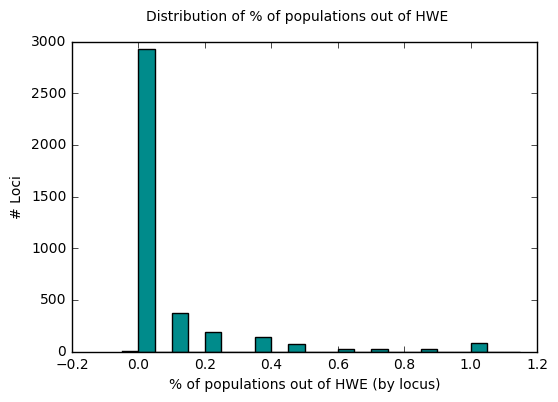

In [49]:
plt.hist(percents, bins = np.arange(-0.1, 1.1, .05)+0.05, color = "darkcyan")
plt.suptitle("Distribution of % of populations out of HWE")
plt.xlabel("% of populations out of HWE (by locus)")
plt.ylabel("# Loci")
plt.show()

In [50]:
plt.close()


<br>
Based on the distribution above, I'm going to create a list of the loci that are out of Hardy-Weinberg Equilibrium in more than 6 of the populations (0.75). 

Since the loci were added to `loci_list` in the same order as the percents were added to `percents`, I can do this by extracting a list of indices from percents and then using those to refer to certain loci. 

In [63]:
#extract indices of loci with >6 pops out of HWE
indices = []
count = 0 

for i in range(0, len(percents)):
    if percents[i] >= 0.75:
        indices.append(i)

In [65]:
print len(indices)

126


In [66]:
# create a new list of loci to remove and write to file for later. 
outfile = open("Loci_outof_HWE_6of8pops.txt", "w")
outfile.write("# These loci have more than 6 populations out of HWE. 4-5-2017.\n")

for index in indices:
    newlocus = loci_list[index]
    outfile.write(newlocus + "\n")
outfile.close()